# Forex Daily Chart statistical research

This Notebook analyse forex data from EURUSD pair D1 timeframe for correlation market 
the data is from the duration of january 1st 2020 to december 31st 2020, the aim of this research is to find a pattern 
the placing trades in the Forex markert, in other to accurately predict where a market will move, from 
the previous candles.

In [1]:
#import the relevant packages
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#read data
data = pd.read_csv('DataSet/EURUSD_Daily_202001020000_202012310000.csv', '\t')
data

<DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
0    2020.01.02  1.12132  1.12143  1.11635  1.11722      30404      0   
1    2020.01.03  1.11722  1.11797  1.11250  1.11558      39449      0   
2    2020.01.06  1.11646  1.12054  1.11571  1.11968      32448      0   
3    2020.01.07  1.11960  1.11975  1.11335  1.11526      35909      0   
4    2020.01.08  1.11529  1.11681  1.11016  1.11053      50619      0   
..          ...      ...      ...      ...      ...        ...    ...   
255  2020.12.24  1.21857  1.22157  1.21774  1.21808      47758      0   
256  2020.12.28  1.21696  1.22506  1.21696  1.22160      65208      0   
257  2020.12.29  1.22160  1.22749  1.22070  1.22482      56037      0   
258  2020.12.30  1.22471  1.23099  1.22470  1.22961      66896      0   
259  2020.12.31  1.22963  1.23093  1.22127  1.22155      58559      0   

     <SPREAD>  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
255         0  
256         0  
257         0  
258         0  
259         0  

[260 rows x 8 columns]

In [3]:
#drop the <VOL>, column as it is not needed in this research
data.drop("<VOL>", inplace=True, axis=1)
data

<DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <SPREAD>
0    2020.01.02  1.12132  1.12143  1.11635  1.11722      30404         1
1    2020.01.03  1.11722  1.11797  1.11250  1.11558      39449         1
2    2020.01.06  1.11646  1.12054  1.11571  1.11968      32448         1
3    2020.01.07  1.11960  1.11975  1.11335  1.11526      35909         1
4    2020.01.08  1.11529  1.11681  1.11016  1.11053      50619         1
..          ...      ...      ...      ...      ...        ...       ...
255  2020.12.24  1.21857  1.22157  1.21774  1.21808      47758         0
256  2020.12.28  1.21696  1.22506  1.21696  1.22160      65208         0
257  2020.12.29  1.22160  1.22749  1.22070  1.22482      56037         0
258  2020.12.30  1.22471  1.23099  1.22470  1.22961      66896         0
259  2020.12.31  1.22963  1.23093  1.22127  1.22155      58559         0

[260 rows x 7 columns]

In [4]:
#ploting the last 20 candles
df = data[-20:]

fig = go.Figure(data=go.Ohlc(x=df['<DATE>'], 
                             open=df['<OPEN>'], 
                             high=df['<HIGH>'], 
                             low=df['<LOW>'], 
                             close=df['<CLOSE>']))
fig.show()

### Functions used in this study

In [5]:
def get_body(data):
    
    '''
    Functions to get the difference between the close and open of a candle
    '''
    
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(close)):
        result.append((close[i] - open_[i]) * 10000)
        
    return result

In [6]:
def get_abs_body(data):
    
    '''
    Functions to get the absolute value of the difference 
    between the close and open of a candle
    '''
    
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(close)):
        result.append(abs(close[i] - open_[i]) * 10000)
        
    return result

In [7]:
def get_high_low(data):
    
    '''
    Functions to get the difference between the high and low of a candle
    '''
    
    high = data["<HIGH>"].to_numpy()
    low = data["<LOW>"].to_numpy()
    
    result = []
    
    for i in range(0, len(high)):
        result.append((high[i] - low[i]) * 10000)
        
    return result

In [8]:
def get_high_wink(data):
    
    '''
    Functions to get the difference between the highest and 
    the next high point of a candle
    '''
    
    high = data["<HIGH>"].to_numpy()
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(high)):
        result.append((high[i] - (close[i] if close[i] >= open_[i] else open_[i])) * 10000)
        
    return result

In [9]:
def get_low_wink(data):
    
    '''
    Functions to get the difference between the lowest and 
    the next low point of a candle
    '''
    
    low = data["<LOW>"].to_numpy()
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(low)):
        result.append(((close[i] if close[i] <= open_[i] else open_[i]) - low[i]) * 10000)
        
    return result

In [10]:
def get_up_movement(data):
    
    '''
    Functions to get the difference between the high and 
    open of a candle
    '''
    
    high = data["<HIGH>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(high)):
        result.append((high[i] - open_[i]) * 10000)
        
    return result

In [11]:
def get_down_movement(data):
    
    '''
    Functions to get the difference between the open and 
    low of a candle
    '''
    
    open_ = data["<OPEN>"].to_numpy()
    low = data["<LOW>"].to_numpy()
    
    result = []
    
    for i in range(0, len(low)):
        result.append((open_[i] - low[i]) * 10000)
        
    return result

In [12]:
def get_real_movement(data):
    
    '''
    Functions to get the difference between the close and 
    open of a candle
    '''
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(close)):
        result.append((close[i] - open_[i]) * 10000)
        
    return result

In [13]:
def test_data(data, current, future_1, future_2, pips_1, pips_2, pips_3):
    
    result = data[data[current] > pips_1]
    result = result[result[future_1] > pips_2]
    result = result[result[future_2] < pips_3]
    
    return len(result)

In [14]:
def get_signal(data, current, pips, position = None):
    
    if (position is True):
        result = data[data[current] > pips]
        result = result[result["Real Move*"] >= 0]
    
    if (position is False):
        result = data[data[current] > pips]
        result = result[result["Real Move*"] <= 0]
        
    if (position is None):
        result = data[data[current] > pips]
    
    return len(result)

### Get the required data

In [15]:
body = get_body(data)

In [16]:
abs_body = get_abs_body(data)

In [17]:
high = get_high_wink(data)

In [18]:
low = get_low_wink(data)

In [19]:
high_low = get_high_low(data)

In [20]:
up_move = get_up_movement(data)

In [21]:
down_move = get_down_movement(data)

In [22]:
real_move = get_real_movement(data)

In [23]:
#Create a dataframe the data
dic = {
        'High Wink': high, 
        'Candle Body': body, 
        'Low Wink': low, 
        'High Low': high_low,
        'Abs Candle Body': abs_body,
        'Real Move': real_move,
        'Up Move': up_move,
        'Down Move': down_move
        
    } 
df = pd.DataFrame(dic)
df

High Wink  Candle Body  Low Wink  High Low  Abs Candle Body  Real Move  \
0          1.1        -41.0       8.7      50.8             41.0      -41.0   
1          7.5        -16.4      30.8      54.7             16.4      -16.4   
2          8.6         32.2       7.5      48.3             32.2       32.2   
3          1.5        -43.4      19.1      64.0             43.4      -43.4   
4         15.2        -47.6       3.7      66.5             47.6      -47.6   
..         ...          ...       ...       ...              ...        ...   
255       30.0         -4.9       3.4      38.3              4.9       -4.9   
256       34.6         46.4       0.0      81.0             46.4       46.4   
257       26.7         32.2       9.0      67.9             32.2       32.2   
258       13.8         49.0       0.1      62.9             49.0       49.0   
259       13.0        -80.8       2.8      96.6             80.8      -80.8   

     Up Move  Down Move  
0        1.1       49.7  
1        7.5       47.2  
2       40.8        7.5  
3        1.5       62.5  
4       15.2       51.3  
..       ...        ...  
255     30.0        8.3  
256     81.0        0.0  
257     58.9        9.0  
258     62.8        0.1  
259     13.0       83.6  

[260 rows x 8 columns]

In [24]:
#Create dataframe of the next day
next_day = df.iloc[1:,]
next_day

High Wink  Candle Body  Low Wink  High Low  Abs Candle Body  Real Move  \
1          7.5        -16.4      30.8      54.7             16.4      -16.4   
2          8.6         32.2       7.5      48.3             32.2       32.2   
3          1.5        -43.4      19.1      64.0             43.4      -43.4   
4         15.2        -47.6       3.7      66.5             47.6      -47.6   
5         15.0         -0.2      12.8      28.0              0.2       -0.2   
..         ...          ...       ...       ...              ...        ...   
255       30.0         -4.9       3.4      38.3              4.9       -4.9   
256       34.6         46.4       0.0      81.0             46.4       46.4   
257       26.7         32.2       9.0      67.9             32.2       32.2   
258       13.8         49.0       0.1      62.9             49.0       49.0   
259       13.0        -80.8       2.8      96.6             80.8      -80.8   

     Up Move  Down Move  
1        7.5       47.2  
2       40.8        7.5  
3        1.5       62.5  
4       15.2       51.3  
5       15.0       13.0  
..       ...        ...  
255     30.0        8.3  
256     81.0        0.0  
257     58.9        9.0  
258     62.8        0.1  
259     13.0       83.6  

[259 rows x 8 columns]

In [25]:
next_day.columns = ["High Wink*", "Candle Body*", "Low Wink*", "High Low*", "Abs Candle Body*", "Real Move*", "Up Move*", "Down Move*"]

In [26]:
next_day.reset_index(inplace=True)
next_day.drop(["index"], axis = 1, inplace=True)

C:\Users\Joshua\anaconda3\envs\tf_env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
next_day

High Wink*  Candle Body*  Low Wink*  High Low*  Abs Candle Body*  \
0           7.5         -16.4       30.8       54.7              16.4   
1           8.6          32.2        7.5       48.3              32.2   
2           1.5         -43.4       19.1       64.0              43.4   
3          15.2         -47.6        3.7       66.5              47.6   
4          15.0          -0.2       12.8       28.0               0.2   
..          ...           ...        ...        ...               ...   
254        30.0          -4.9        3.4       38.3               4.9   
255        34.6          46.4        0.0       81.0              46.4   
256        26.7          32.2        9.0       67.9              32.2   
257        13.8          49.0        0.1       62.9              49.0   
258        13.0         -80.8        2.8       96.6              80.8   

     Real Move*  Up Move*  Down Move*  
0         -16.4       7.5        47.2  
1          32.2      40.8         7.5  
2         -43.4       1.5        62.5  
3         -47.6      15.2        51.3  
4          -0.2      15.0        13.0  
..          ...       ...         ...  
254        -4.9      30.0         8.3  
255        46.4      81.0         0.0  
256        32.2      58.9         9.0  
257        49.0      62.8         0.1  
258       -80.8      13.0        83.6  

[259 rows x 8 columns]

In [28]:
#concat df and next_day to create a new dataframe
dataset = pd.concat([df, next_day], axis = 1)
dataset.dropna(inplace=True)
dataset

High Wink  Candle Body  Low Wink  High Low  Abs Candle Body  Real Move  \
0          1.1        -41.0       8.7      50.8             41.0      -41.0   
1          7.5        -16.4      30.8      54.7             16.4      -16.4   
2          8.6         32.2       7.5      48.3             32.2       32.2   
3          1.5        -43.4      19.1      64.0             43.4      -43.4   
4         15.2        -47.6       3.7      66.5             47.6      -47.6   
..         ...          ...       ...       ...              ...        ...   
254       35.2         24.2       7.8      67.2             24.2       24.2   
255       30.0         -4.9       3.4      38.3              4.9       -4.9   
256       34.6         46.4       0.0      81.0             46.4       46.4   
257       26.7         32.2       9.0      67.9             32.2       32.2   
258       13.8         49.0       0.1      62.9             49.0       49.0   

     Up Move  Down Move  High Wink*  Candle Body*  Low Wink*  High Low*  \
0        1.1       49.7         7.5         -16.4       30.8       54.7   
1        7.5       47.2         8.6          32.2        7.5       48.3   
2       40.8        7.5         1.5         -43.4       19.1       64.0   
3        1.5       62.5        15.2         -47.6        3.7       66.5   
4       15.2       51.3        15.0          -0.2       12.8       28.0   
..       ...        ...         ...           ...        ...        ...   
254     59.4        7.8        30.0          -4.9        3.4       38.3   
255     30.0        8.3        34.6          46.4        0.0       81.0   
256     81.0        0.0        26.7          32.2        9.0       67.9   
257     58.9        9.0        13.8          49.0        0.1       62.9   
258     62.8        0.1        13.0         -80.8        2.8       96.6   

     Abs Candle Body*  Real Move*  Up Move*  Down Move*  
0                16.4       -16.4       7.5        47.2  
1                32.2        32.2      40.8         7.5  
2                43.4       -43.4       1.5        62.5  
3                47.6       -47.6      15.2        51.3  
4                 0.2        -0.2      15.0        13.0  
..                ...         ...       ...         ...  
254               4.9        -4.9      30.0         8.3  
255              46.4        46.4      81.0         0.0  
256              32.2        32.2      58.9         9.0  
257              49.0        49.0      62.8         0.1  
258              80.8       -80.8      13.0        83.6  

[259 rows x 16 columns]

In [29]:
# Decribe the data
dataset.describe()

High Wink  Candle Body    Low Wink    High Low  Abs Candle Body  \
count  259.000000   259.000000  259.000000  259.000000       259.000000   
mean    23.466023     4.481853   20.267181   84.709266        40.976062   
std     19.520973    52.562048   20.079774   42.358469        33.126851   
min      0.000000  -252.800000    0.000000   21.800000         0.000000   
25%      9.250000   -31.200000    6.900000   56.300000        16.300000   
50%     19.000000     2.200000   14.500000   75.800000        33.400000   
75%     31.050000    39.550000   26.700000  102.000000        56.350000   
max    137.400000   149.400000  113.100000  327.600000       252.800000   

        Real Move     Up Move   Down Move  High Wink*  Candle Body*  \
count  259.000000  259.000000  259.000000  259.000000    259.000000   
mean     4.481853   46.194981   38.514286   23.511969      4.328185   
std     52.562048   36.233287   38.251742   19.482092     52.753363   
min   -252.800000    0.000000    0.000000    0.000000   -252.800000   
25%    -31.200000   18.100000   11.950000    9.400000    -31.200000   
50%      2.200000   38.200000   27.600000   19.000000      2.200000   
75%     39.550000   63.750000   52.200000   31.050000     39.550000   
max    149.400000  178.900000  257.600000  137.400000    149.400000   

        Low Wink*   High Low*  Abs Candle Body*  Real Move*    Up Move*  \
count  259.000000  259.000000        259.000000  259.000000  259.000000   
mean    20.244402   84.886100         41.129730    4.328185   46.240927   
std     20.096288   42.311935         33.219146   52.753363   36.183393   
min      0.000000   21.800000          0.000000 -252.800000    0.000000   
25%      6.750000   56.600000         16.300000  -31.200000   18.100000   
50%     14.500000   76.000000         33.400000    2.200000   38.200000   
75%     26.700000  102.000000         56.750000   39.550000   63.750000   
max    113.100000  327.600000        252.800000  149.400000  178.900000   

       Down Move*  
count  259.000000  
mean    38.645174  
std     38.348043  
min      0.000000  
25%     11.950000  
50%     27.600000  
75%     52.500000  
max    257.600000

### Plot an heatmap of the correlation

<AxesSubplot:>

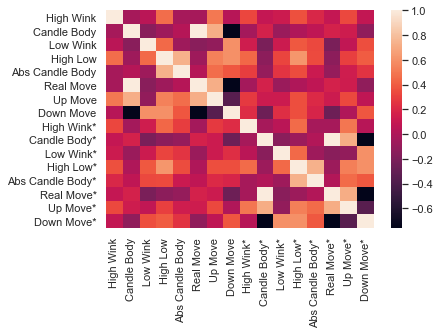

In [30]:
#Get correlation of the data
corr = dataset.corr()
sns.heatmap(corr)

Remove the rest data from the dataset of the next day, leaving just Up Real Move*, Move* and Down Move*

In [31]:
reduced_dataset = dataset.drop(["High Wink*", "Candle Body*", "Low Wink*", "High Low*", "Abs Candle Body*"], axis=1)
reduced_dataset

High Wink  Candle Body  Low Wink  High Low  Abs Candle Body  Real Move  \
0          1.1        -41.0       8.7      50.8             41.0      -41.0   
1          7.5        -16.4      30.8      54.7             16.4      -16.4   
2          8.6         32.2       7.5      48.3             32.2       32.2   
3          1.5        -43.4      19.1      64.0             43.4      -43.4   
4         15.2        -47.6       3.7      66.5             47.6      -47.6   
..         ...          ...       ...       ...              ...        ...   
254       35.2         24.2       7.8      67.2             24.2       24.2   
255       30.0         -4.9       3.4      38.3              4.9       -4.9   
256       34.6         46.4       0.0      81.0             46.4       46.4   
257       26.7         32.2       9.0      67.9             32.2       32.2   
258       13.8         49.0       0.1      62.9             49.0       49.0   

     Up Move  Down Move  Real Move*  Up Move*  Down Move*  
0        1.1       49.7       -16.4       7.5        47.2  
1        7.5       47.2        32.2      40.8         7.5  
2       40.8        7.5       -43.4       1.5        62.5  
3        1.5       62.5       -47.6      15.2        51.3  
4       15.2       51.3        -0.2      15.0        13.0  
..       ...        ...         ...       ...         ...  
254     59.4        7.8        -4.9      30.0         8.3  
255     30.0        8.3        46.4      81.0         0.0  
256     81.0        0.0        32.2      58.9         9.0  
257     58.9        9.0        49.0      62.8         0.1  
258     62.8        0.1       -80.8      13.0        83.6  

[259 rows x 11 columns]

### Plot an heatmap of the correlation

<AxesSubplot:>

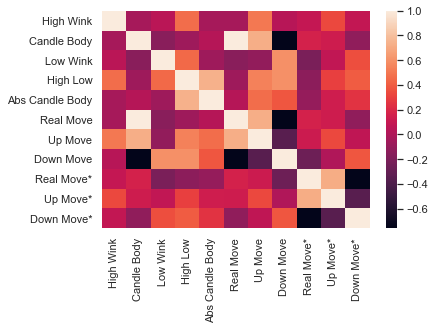

In [32]:
rd_corr = reduced_dataset.corr()
sns.heatmap(rd_corr)

# Regression plots of Today data againts the Next Day data

### For Up Move*

<AxesSubplot:>

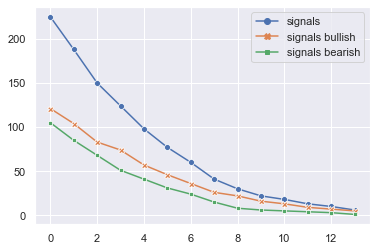

In [33]:
#Get total signal
signals = [get_signal(reduced_dataset, 'Up Move', i, None) for i in range(10, 150, 10)]
#Get bullish signal
signals_bullish = [get_signal(reduced_dataset, 'Up Move', i, True) for i in range(10, 150, 10)]
#Get bearish signal
signals_bearish = [get_signal(reduced_dataset, 'Up Move', i, False) for i in range(10, 150, 10)]

test_dataset = {
    "signals": signals,
    "signals bullish": signals_bullish,
    "signals bearish": signals_bearish,
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

From the plot above it can be seen that as the number of pips increases the numbers of signals decreases

<AxesSubplot:>

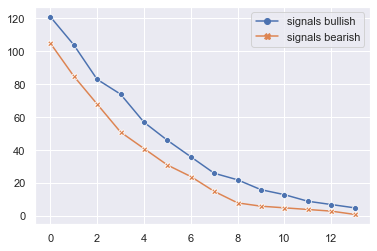

In [34]:
test_dataset = {
    "signals bullish": signals_bullish,
    "signals bearish": signals_bearish,
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

From the plot above it can be seen that as the number of pips increases the numbers of signals decreases
and there are more bullish signals that bearish signals

##### Test For Up Move* against High Wink

<AxesSubplot:xlabel='High Wink', ylabel='Up Move*'>

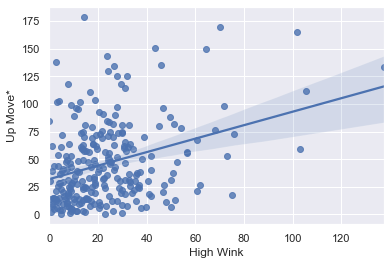

In [35]:
sns.regplot(x = reduced_dataset['High Wink'], y = reduced_dataset['Up Move*'])

<AxesSubplot:>

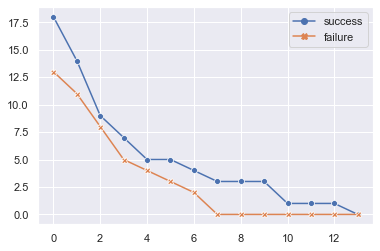

In [36]:
# Get signal that passed
success = [test_data(reduced_dataset, 'High Wink', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'High Wink', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

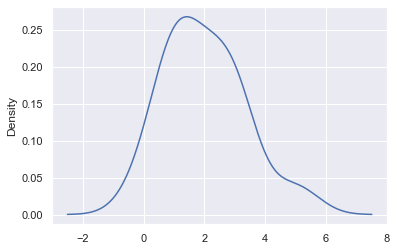

In [37]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

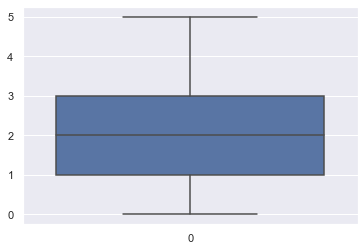

In [38]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

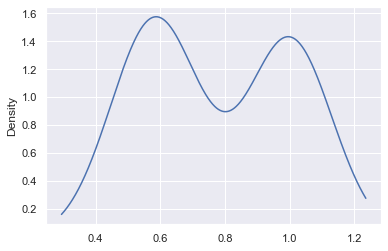

In [39]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(13) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

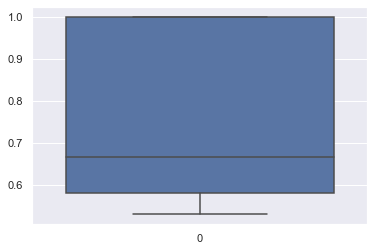

In [40]:
sns.boxplot(data=success_ratio)

##### Test For Up Move* against Abs Candle Body

<AxesSubplot:xlabel='Abs Candle Body', ylabel='Up Move*'>

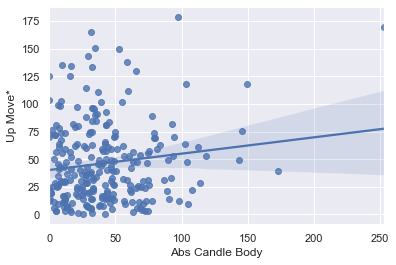

In [41]:
sns.regplot(x = reduced_dataset['Abs Candle Body'], y = reduced_dataset['Up Move*'])

<AxesSubplot:>

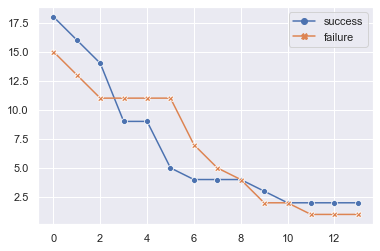

In [42]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Abs Candle Body', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Abs Candle Body', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

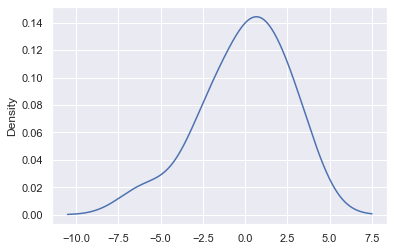

In [43]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

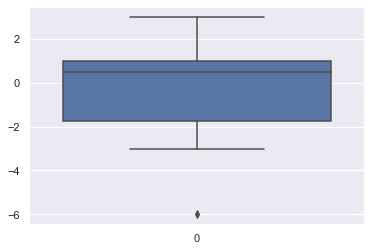

In [44]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

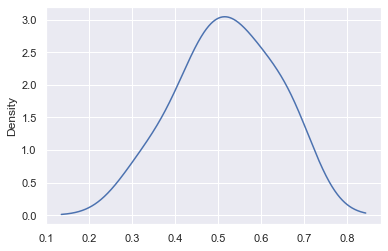

In [45]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

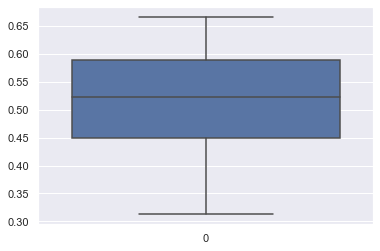

In [46]:
sns.boxplot(data=success_ratio)

##### Test For Up Move* against Low Wink

<AxesSubplot:xlabel='Low Wink', ylabel='Up Move*'>

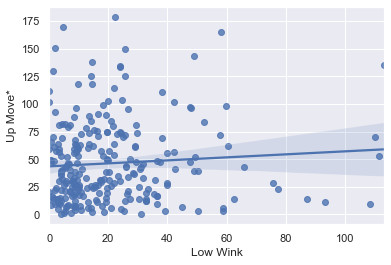

In [47]:
sns.regplot(x = reduced_dataset['Low Wink'], y = reduced_dataset['Up Move*'])

<AxesSubplot:>

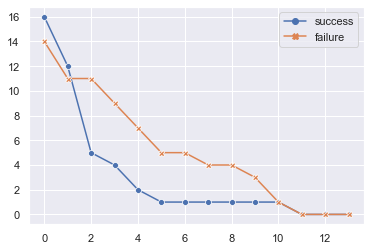

In [48]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Low Wink', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Low Wink', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

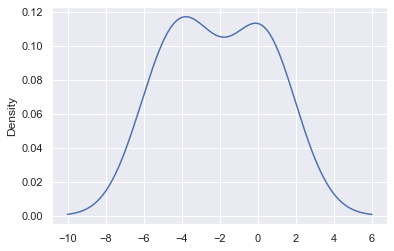

In [49]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

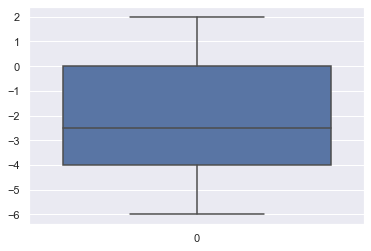

In [50]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

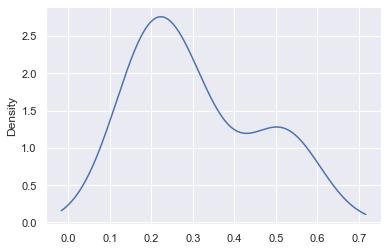

In [51]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(11) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

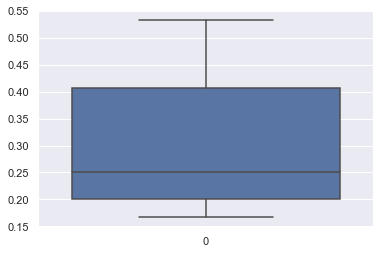

In [52]:
sns.boxplot(data=success_ratio)

##### Test For Up Move* against High Low

<AxesSubplot:xlabel='High Low', ylabel='Up Move*'>

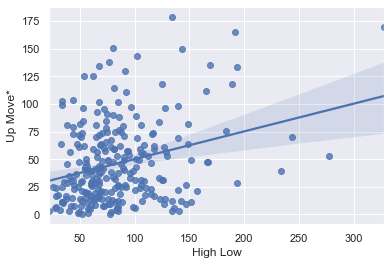

In [53]:
sns.regplot(x = reduced_dataset['High Low'], y = reduced_dataset['Up Move*'])

<AxesSubplot:>

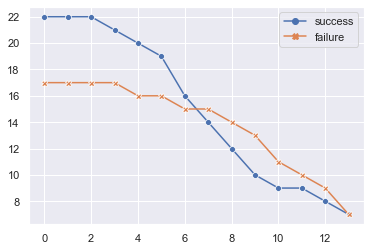

In [54]:
# Get signal that passed
success = [test_data(reduced_dataset, 'High Low', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'High Low', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

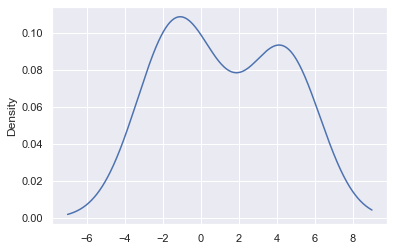

In [55]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

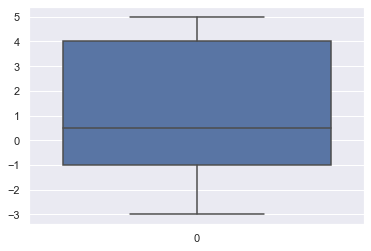

In [56]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

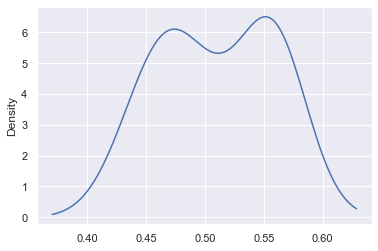

In [57]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

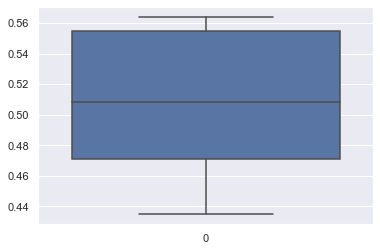

In [58]:
sns.boxplot(data=success_ratio)

##### Test For Up Move* against Abs Candle Body

<AxesSubplot:xlabel='Abs Candle Body', ylabel='Up Move*'>

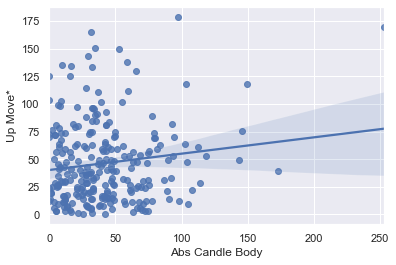

In [59]:
sns.regplot(x = reduced_dataset['Abs Candle Body'], y = reduced_dataset['Up Move*'])

<AxesSubplot:>

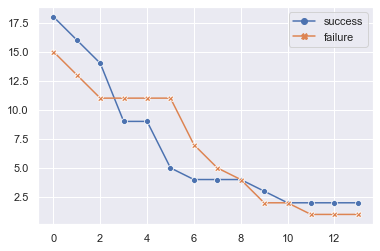

In [60]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Abs Candle Body', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Abs Candle Body', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

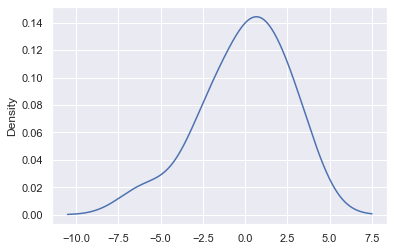

In [61]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

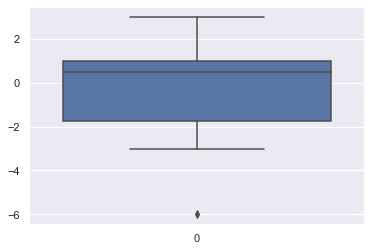

In [62]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

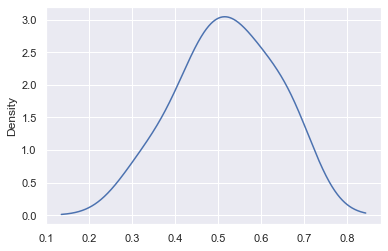

In [63]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

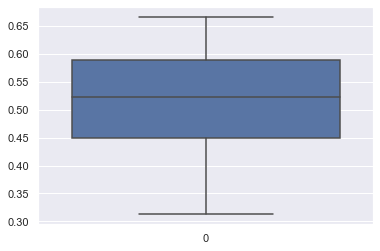

In [64]:
sns.boxplot(data=success_ratio)

##### Test For Up Move* against Up Move

<AxesSubplot:xlabel='Up Move', ylabel='Up Move*'>

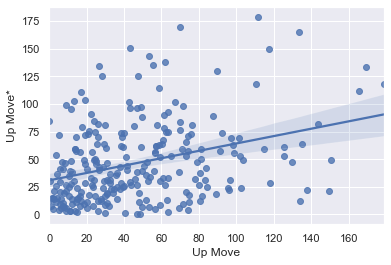

In [65]:
sns.regplot(x = reduced_dataset['Up Move'], y = reduced_dataset['Up Move*'])

<AxesSubplot:>

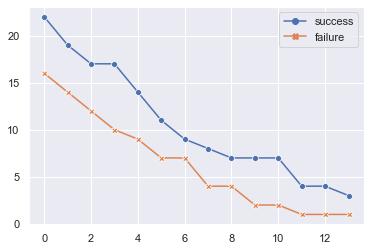

In [66]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Up Move', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Up Move', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

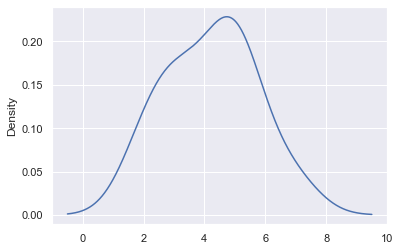

In [67]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

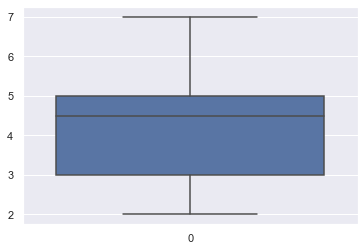

In [68]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

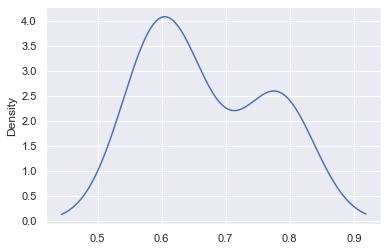

In [69]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

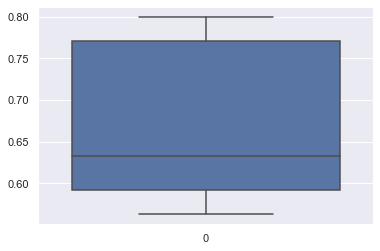

In [70]:
sns.boxplot(data=success_ratio)

##### Test For Up Move* against Down Move

<AxesSubplot:xlabel='Down Move', ylabel='Up Move*'>

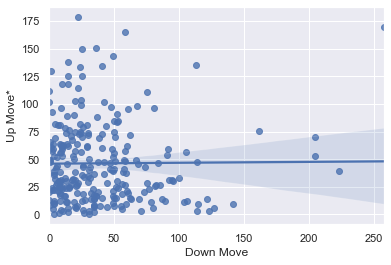

In [71]:
sns.regplot(x = reduced_dataset['Down Move'], y = reduced_dataset['Up Move*'])

<AxesSubplot:>

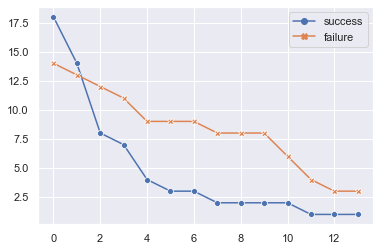

In [72]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Down Move', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Down Move', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

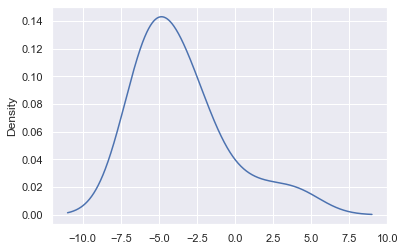

In [73]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

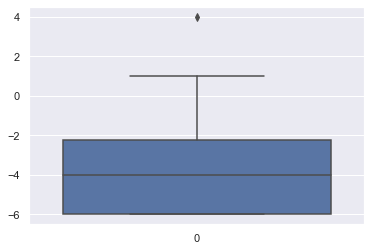

In [74]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

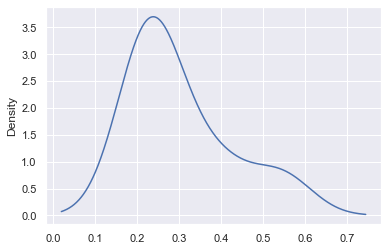

In [75]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

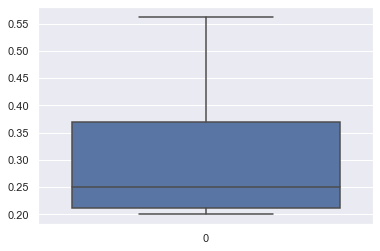

In [76]:
sns.boxplot(data=success_ratio)

<AxesSubplot:xlabel='Real Move', ylabel='Up Move*'>

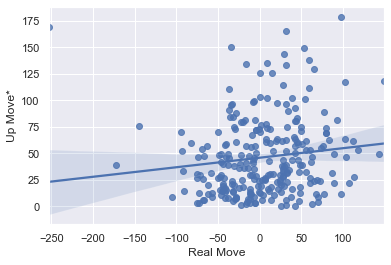

In [77]:
sns.regplot(x = reduced_dataset['Real Move'], y = reduced_dataset['Up Move*'])

<AxesSubplot:>

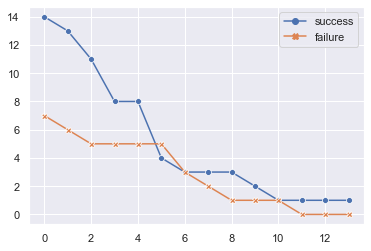

In [78]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Real Move', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Real Move', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

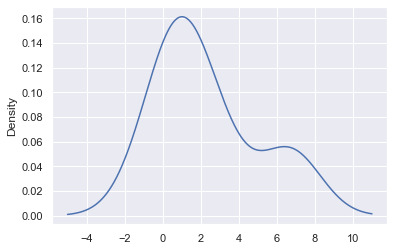

In [79]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

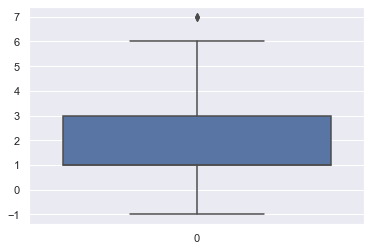

In [80]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

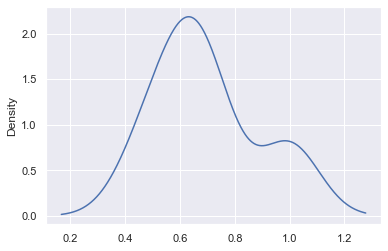

In [81]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

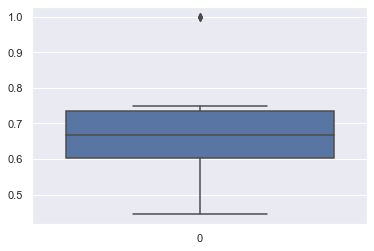

In [82]:
sns.boxplot(data=success_ratio)

## For Down Move*

<AxesSubplot:>

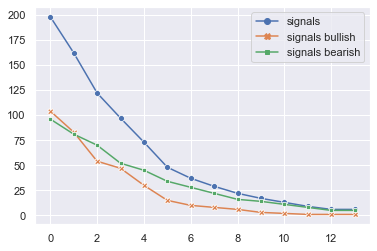

In [83]:
#Get total signal
signals = [get_signal(reduced_dataset, 'Down Move', i, None) for i in range(10, 150, 10)]
#Get bullish signal
signals_bullish = [get_signal(reduced_dataset, 'Down Move', i, True) for i in range(10, 150, 10)]
#Get bearish signal
signals_bearish = [get_signal(reduced_dataset, 'Down Move', i, False) for i in range(10, 150, 10)]

test_dataset = {
    "signals": signals,
    "signals bullish": signals_bullish,
    "signals bearish": signals_bearish,
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:>

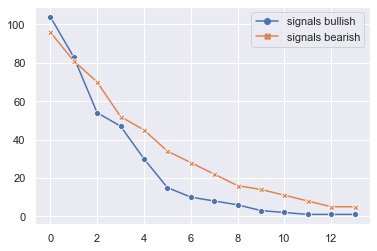

In [84]:
test_dataset = {
    "signals bullish": signals_bullish,
    "signals bearish": signals_bearish,
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

From the plot above it can be seen that as the number of pips increases the numbers of signals decreases
and there are less bullish signals than bearish signals, but initially there was more bullish signals

##### Test For Down Move* against High Wink

<AxesSubplot:xlabel='High Wink', ylabel='Down Move*'>

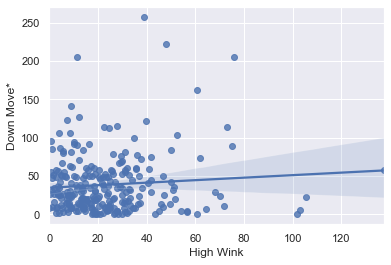

In [85]:
sns.regplot(x = reduced_dataset['High Wink'], y = reduced_dataset['Down Move*'])

<AxesSubplot:>

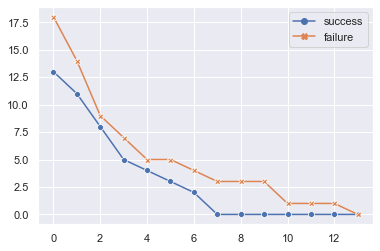

In [86]:
# Get signal that passed
success = [test_data(reduced_dataset, 'High Wink', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'High Wink', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

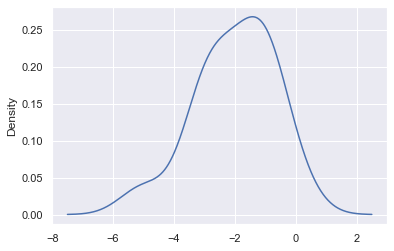

In [87]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

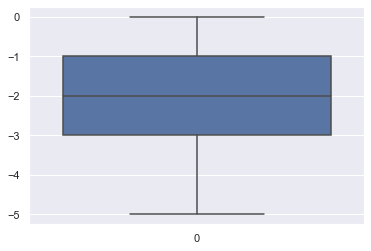

In [88]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

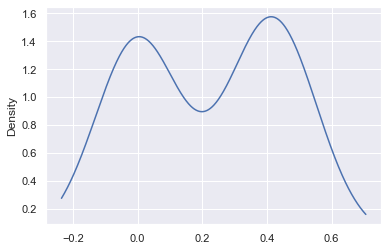

In [89]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(13) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

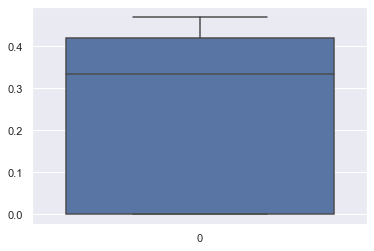

In [90]:
sns.boxplot(data=success_ratio)

##### Test For Down Move* against Low Wink

<AxesSubplot:xlabel='Low Wink', ylabel='Down Move*'>

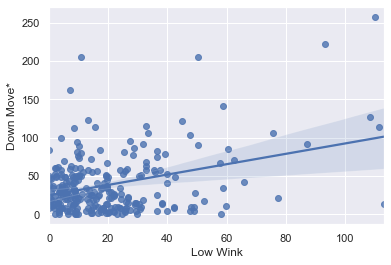

In [91]:
sns.regplot(x = reduced_dataset['Low Wink'], y = reduced_dataset['Down Move*'])

<AxesSubplot:>

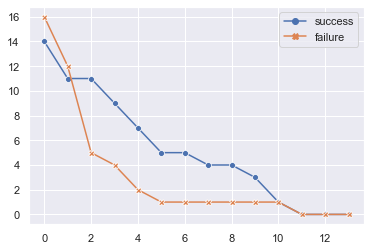

In [92]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Low Wink', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Low Wink', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

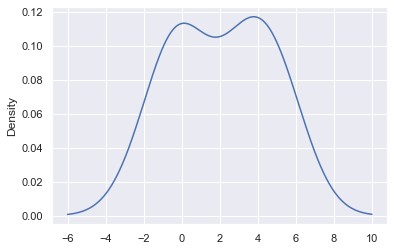

In [93]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

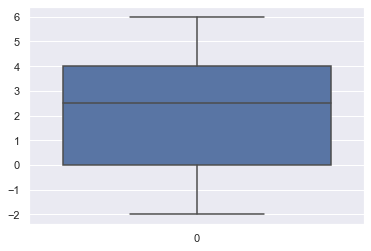

In [94]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

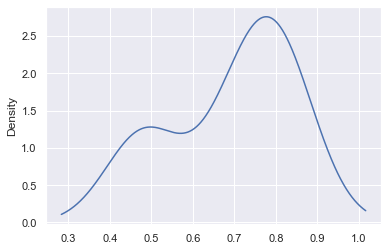

In [95]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(11) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

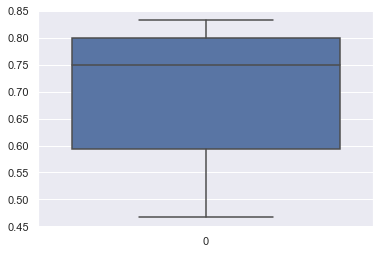

In [96]:
sns.boxplot(data=success_ratio)

##### Test For Down Move* against High Low

<AxesSubplot:xlabel='High Low', ylabel='Down Move*'>

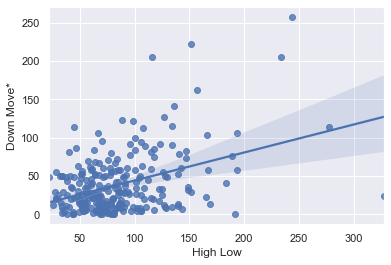

In [97]:
sns.regplot(x = reduced_dataset['High Low'], y = reduced_dataset['Down Move*'])

<AxesSubplot:>

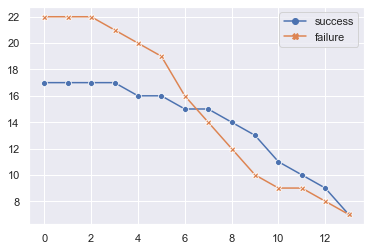

In [98]:
# Get signal that passed
success = [test_data(reduced_dataset, 'High Low', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'High Low', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

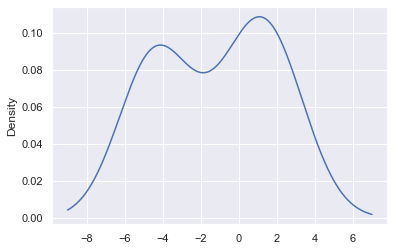

In [99]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
s = pd.Series(profit).plot.kde()

<AxesSubplot:>

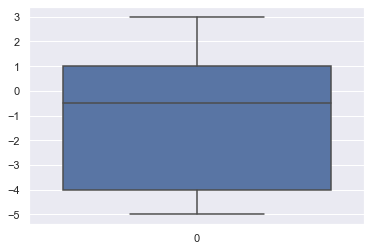

In [100]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

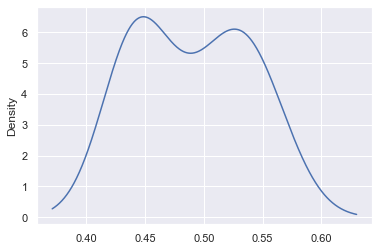

In [101]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

C:\Users\Joshua\anaconda3\envs\tf_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

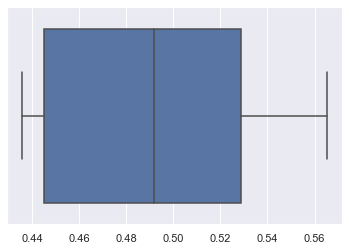

In [102]:
sns.boxplot(data=success_ratio)

##### Test Down Move* against Abs Candle Body

<AxesSubplot:xlabel='Abs Candle Body', ylabel='Down Move*'>

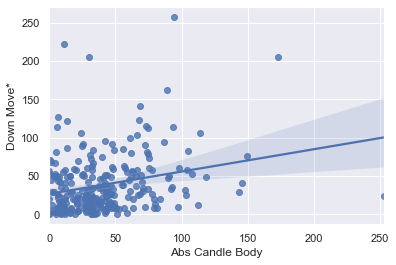

In [103]:
sns.regplot(x = reduced_dataset['Abs Candle Body'], y = reduced_dataset['Down Move*'])

<AxesSubplot:>

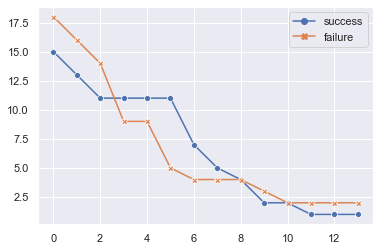

In [104]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Abs Candle Body', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Abs Candle Body', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

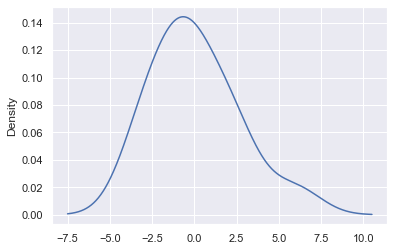

In [105]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

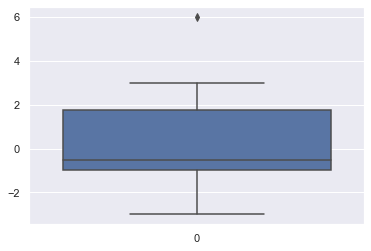

In [106]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

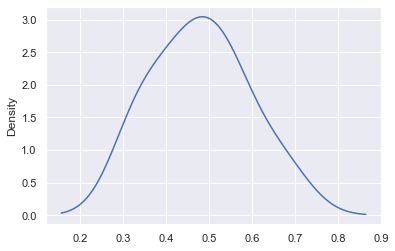

In [107]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

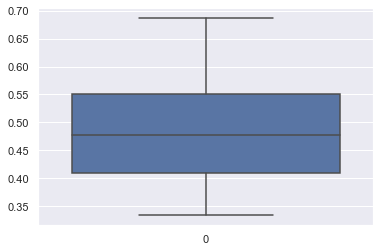

In [108]:
sns.boxplot(data=success_ratio)

##### Test For Down Move* against Up Move

<AxesSubplot:xlabel='Up Move', ylabel='Down Move*'>

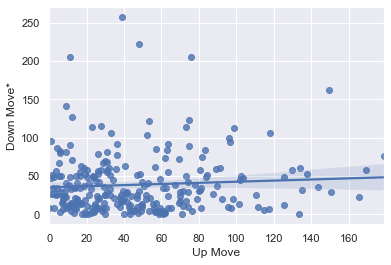

In [109]:
sns.regplot(x = reduced_dataset['Up Move'], y = reduced_dataset['Down Move*'])

<AxesSubplot:>

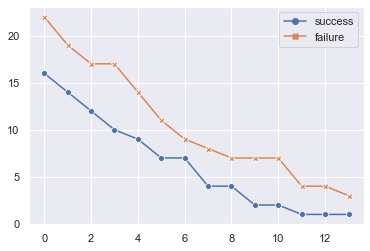

In [110]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Up Move', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Up Move', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

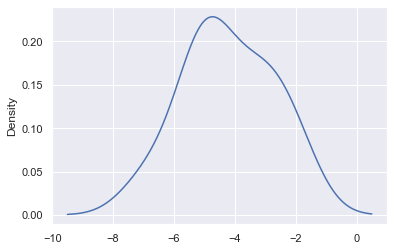

In [111]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

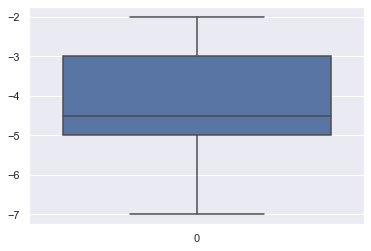

In [112]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

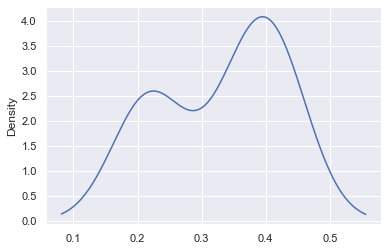

In [113]:
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

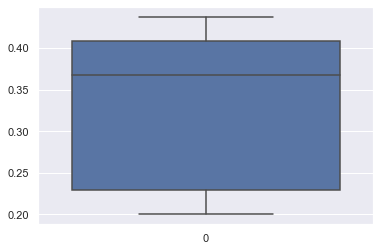

In [114]:
sns.boxplot(data=success_ratio)

##### Test For Down Move* against Down Move

<AxesSubplot:xlabel='Down Move', ylabel='Down Move*'>

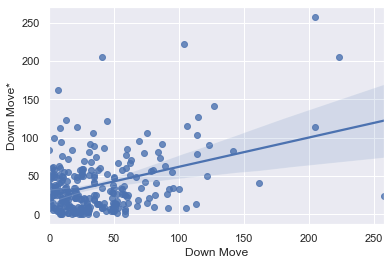

In [115]:
sns.regplot(x = reduced_dataset['Down Move'], y = reduced_dataset['Down Move*'])

<AxesSubplot:>

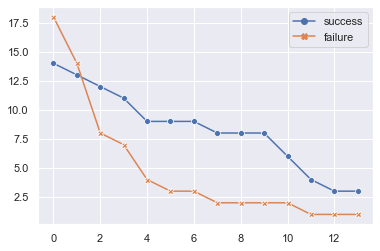

In [116]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Down Move', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Down Move', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

<AxesSubplot:ylabel='Density'>

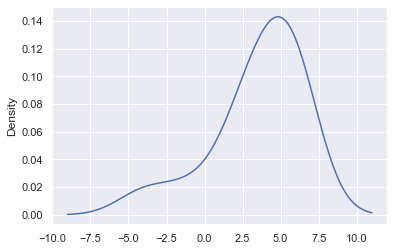

In [117]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
pd.Series(profit).plot.kde()

<AxesSubplot:>

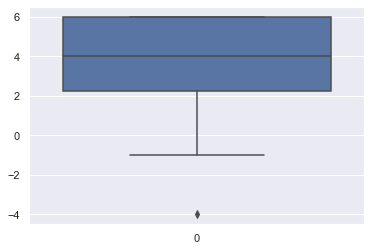

In [118]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

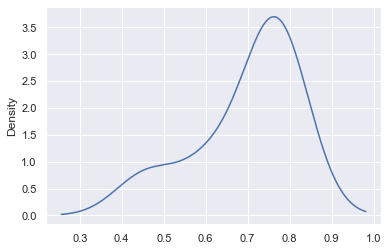

In [119]:
# success to failure ratio
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

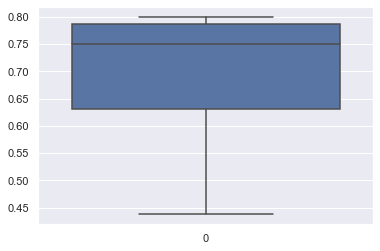

In [120]:
# plot a boxplot of success
sns.boxplot(data=success_ratio)

In [121]:
##### Test For Down Move* against Real Move

<AxesSubplot:xlabel='Real Move', ylabel='Down Move*'>

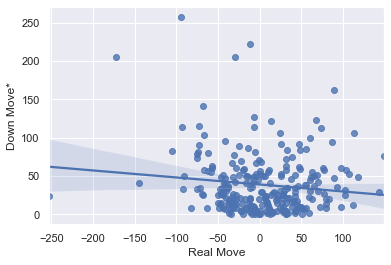

In [122]:
sns.regplot(x = reduced_dataset['Real Move'], y = reduced_dataset['Down Move*'])

<AxesSubplot:>

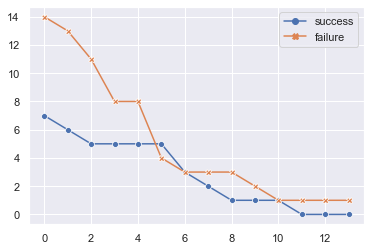

In [123]:
# Get signal that passed
success = [test_data(reduced_dataset, 'Real Move', 'Down Move*', 'Up Move*', i, 100, 100) for i in range(10, 150, 10)]
# Get signal that Failed
failure = [test_data(reduced_dataset, 'Real Move', 'Up Move*', 'Down Move*', i, 100, 100) for i in range(10, 150, 10)]

test_dataset = {
    "success": success,
    "failure": failure
}

sns.lineplot(data = test_dataset, markers=True, dashes=False)

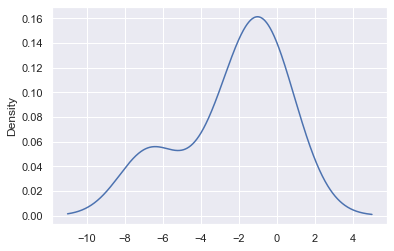

In [124]:
profit = [ success[i] - failure[i] for i in range(len(success)) ]
s = pd.Series(profit).plot.kde()

<AxesSubplot:>

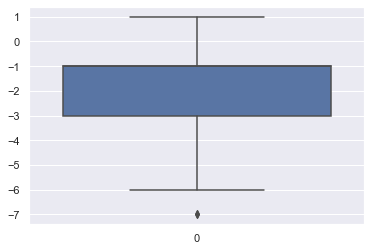

In [125]:
sns.boxplot(data=profit)

<AxesSubplot:ylabel='Density'>

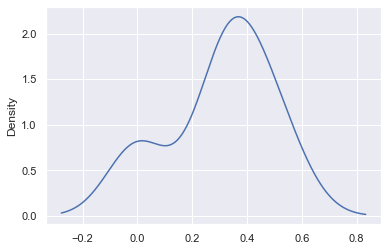

In [126]:
# success to failure ratio
success_ratio = [ success[i] / ( success[i] + failure[i] ) for i in range(len(success)) ]
pd.Series(success_ratio).plot.kde()

<AxesSubplot:>

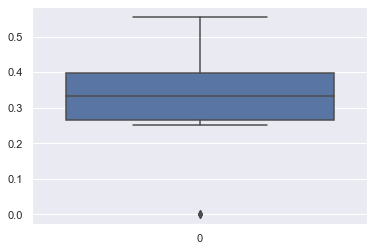

In [127]:
# plot a boxplot of success
sns.boxplot(data=success_ratio)